# Class 10 - Responsible AI

## Agenda
1. Transparency and Explainability
2. Fairness
    - Bias

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Load Data

In [2]:
data_url = 'https://raw.githubusercontent.com/Hospital-Da-Luz-Learning-Health/MLCatolica24/main/Aula%208%20-%20Metrics%20%26%20Model%20Optimization/data/liver_disease.csv'
df = pd.read_csv(data_url, index_col = 'id')
df.shape

(804, 11)

In [3]:
df.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
id,,,,,,,,,,,
572,75,1,32.960731,10.911642,0,0,8.930014,0,1,89.950963,1
125,20,1,30.298513,9.417347,0,0,1.484017,0,0,75.777573,1
1553,21,1,33.230869,1.685287,1,1,3.411027,0,0,69.226081,1
459,54,1,35.986523,16.569763,1,1,4.582832,0,0,53.761885,1
216,47,0,19.132353,15.074681,1,2,5.380676,0,0,23.547537,1


## EDA

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,804.0,47.358209,17.565988,20.000000,33.000000,45.000000,63.000000,80.000000
Gender,804.0,0.406716,0.491527,0.000000,0.000000,0.000000,1.000000,1.000000
BMI,804.0,26.506065,7.342491,15.004710,20.097827,25.821237,33.276118,39.992845
AlcoholConsumption,804.0,7.828501,5.394764,0.003731,3.422090,6.641081,11.409950,19.952456
Smoking,804.0,0.201493,0.401365,0.000000,0.000000,0.000000,0.000000,1.000000
GeneticRisk,804.0,0.444030,0.573905,0.000000,0.000000,0.000000,1.000000,2.000000
PhysicalActivity,804.0,5.322936,2.724577,0.001852,3.123983,5.317782,7.636504,9.994964
Diabetes,804.0,0.104478,0.306070,0.000000,0.000000,0.000000,0.000000,1.000000
Hypertension,804.0,0.094527,0.292743,0.000000,0.000000,0.000000,0.000000,1.000000
LiverFunctionTest,804.0,51.545103,22.441134,20.051157,33.101701,45.875110,67.969025,99.859513


In [5]:
df['Diagnosis'].value_counts()

Diagnosis
0    764
1     40
Name: count, dtype: int64

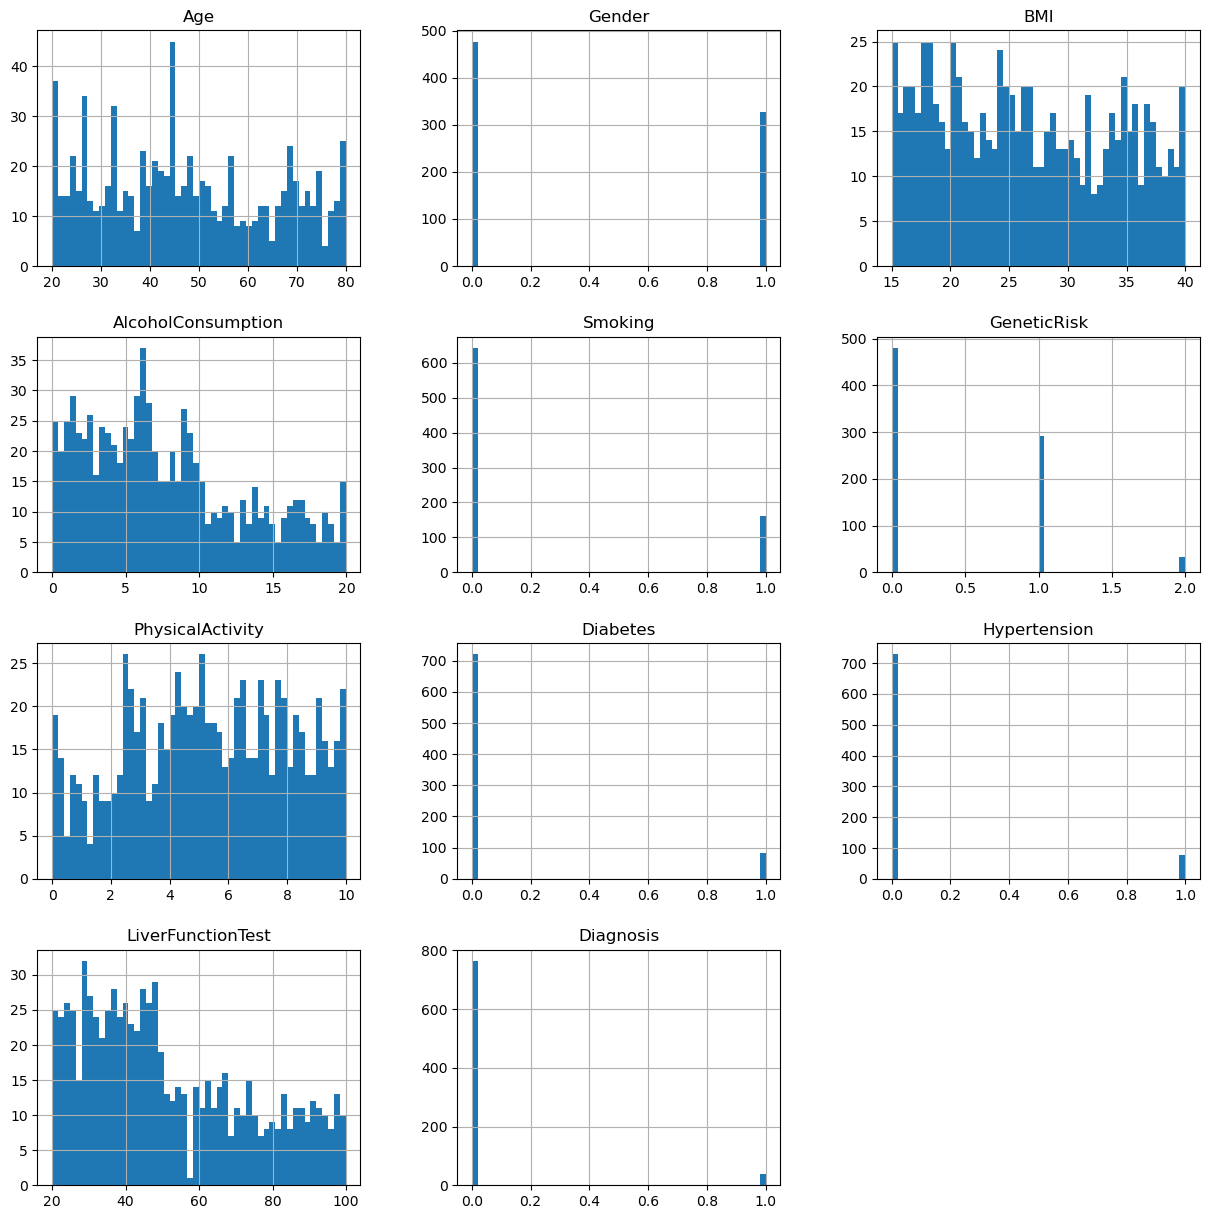

In [6]:
hists = df.hist(bins=50, figsize=(15,15))
plt.show()

## Data Selection and Train/Test split

In [7]:
target_col = 'Diagnosis'

In [8]:
X = df.drop(columns=[target_col])
y = df[target_col]

In [9]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

## 1. Transparency and Explainability

In [10]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
preds = clf.predict(X_test)

In [12]:
import shap

/anaconda/envs/mlcourse_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
